In [1]:
import os
import sys
import warnings
import importlib
import platform
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import pickle
import pprint
import numpy as np
import gvar as gv
import lsqfit 

cwd = Path(os.getcwd())
# Assuming your notebook is in the project root, set the project root as cwd
project_root = cwd.parent
print(project_root)
# project_root = cwd.parent.parent  # Go up two directory levels
# Add the project root directory to sys.path
sys.path.insert(0, str(project_root))
# sys.path.append('../')

import corr_fitter.bs_utils as bs
# import corr_fitter.bs_analysis as bs_analysis
import corr_fitter.load_data_priors as ld
import corr_fitter.corr_fit_analysis as fa

warnings.simplefilter(action="default")
warnings.filterwarnings('ignore')


/home/gmoney/lqcd/corr_fitter


In [9]:
with open('bootstrap_results.p', 'rb') as f:
    results = pickle.load(f)
with open('a12m400.p', 'rb') as f:
    results_gb = pickle.load(f)
# pprint.pprint(results)



0.7206454570941901


In [3]:
# Define paths and other variables
if platform.system() == 'Darwin':
    base_dir = '/Users/grantdb/lqcd/corr_fitter'
else:
    base_dir = '/home/gmoney/lqcd/corr_fitter'
input_dir = os.path.join(base_dir, "tests/input_files")
data_dir = os.path.join(base_dir, "data")
fit_results_dir = os.path.join(base_dir, "fit_results")
if platform.system() == 'Darwin':
    data_file = '/Users/grantdb/lqcd/data/c51_2pt_octet_decuplet.h5'
else:
    data_file = '/home/gmoney/lqcd/data/c51_2pt_octet_decuplet.h5'
# hyperon_data_file = os.path.join(data_dir,"hyperon_data.h5")
bs_data_file = os.path.join(data_dir, "hyperon_bs_data.h5")

In [4]:
lsqfit.__version__
gv.__version__


'11.11.10'

N_states: 1
Baryon: proton
t_range: [12, 19]
scipy_least_squares
Least Square Fit:
  chi2/dof [dof] = 1.1 [14]    Q = 0.34    logGBF = 363.43

Parameters:
    proton_z_P 0       0.00642 (11)        [    0.010 (10) ]  
               1         0.010 (10)        [    0.010 (10) ]  
               2   1e-27 +- 3.3e-06        [  0.0(3.3)e-06 ]  
               3   6e-41 +- 3.3e-06        [  0.0(3.3)e-06 ]  
    proton_z_S 0      0.001652 (27)        [   0.0020 (20) ]  
               1        0.0020 (20)        [   0.0020 (20) ]  
               2      0.000044 (44)        [ 0.000044 (44) ]  
               3      0.000044 (44)        [ 0.000044 (44) ]  
       proton_E0        0.7178 (31)        [     0.68 (25) ]  
log(dE_proton) 0         -0.72 (70)        [    -0.72 (70) ]  
               1         -0.72 (70)        [    -0.72 (70) ]  
               2         -0.72 (70)        [    -0.72 (70) ]  
------------------------------------------------------------
     dE_proton 0          0.

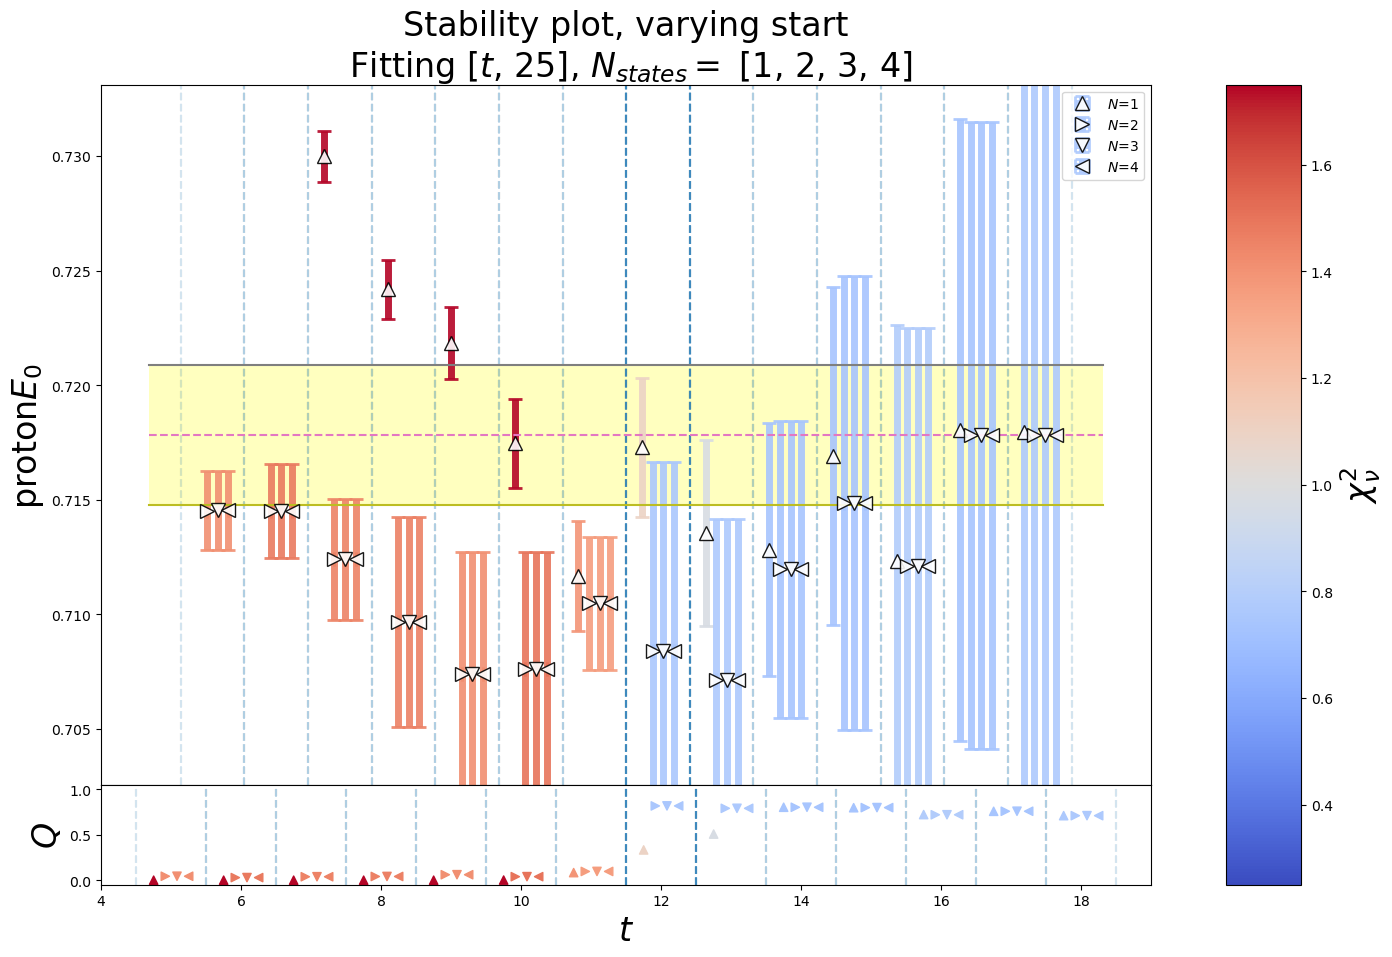

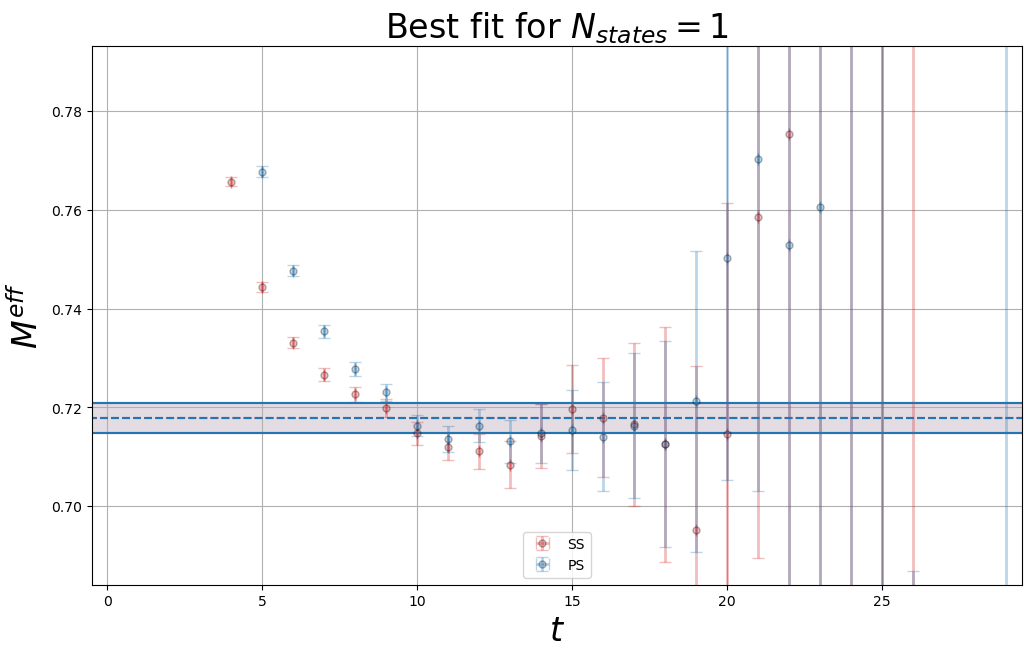

bootstrap: 100%|██████████| 1000/1000 [00:10<00:00, 95.92it/s]



          key/index                   value
------------------------------------------
  log(dE_proton) 0    -0.721546655073 (16)
                 1    -0.721546655073 (16)
                 2    -0.721546655073 (16)
         proton_E0             0.7182 (33)
      proton_z_P 0            0.00642 (12)
                 1                0.01 (0)
                 2        9e-34 +- 3.8e-27
                 3            0.0(1.0)e-40
      proton_z_S 0           0.001652 (28)
                 1               0.002 (0)
                 2              4.4(0)e-05
                 3              4.4(0)e-05
0.7178(31)


In [5]:
importlib.reload(fa)
import gvar as gv
# importlib.reload(fitter)
abbr = 'a12m400'
# pprint.pprint(gv.dataset.avg_data(raw))
# fa.perform_fit_analysis(input_dir,data_file,abbr,all=False,baryon='sigma_p')
fa.perform_fit_analysis(input_dir,data_file,abbr,all=True,show_plots=True,baryon='proton',
                     bs=True,bs_N=1000,seed='a12m400',bs_out='a12m400.p')